# Unsupervised Learning : Assignment 2

TEAM Details:

<b>Group ID</b> - 13 <br>

<b>Group Name</b> - Data Engineers<br>

<b>Group Members</b>:<br>
2020AIML030 - Karunya DS <br>
2020AIML069 - Samtani Edwin<br>
2020AIML022 - Apoorva ventra<br>

## Assignment

Task in this assignment is to:

1. Do appropriate EDA and preprocessing on the data assigned to your group

2. Cluster the data using the algorithms and details mentioned below as a guideline and find out which works best for your data

3. After finding the best clustering obtained for your data, try to interpret some/all of the clusters and derive some domain-specific insights out of the results

Clustering starter ideas:

1. You can check Agglomerative clustering for different linkages (Ward, Complete, Average) and different distance measures (Euclidean, Manhattan, Cosine)

2. You can check DBSCAN clustering for different min_pts and eps values.

Use any clustering metric of your choice to track the performance of the different algorithms and select the final clustering for interpretation.

 

Note: Do not limit your submission notebook to the final algorithm that worked for you, include all experiments, EDA, plots etc in the submission.

## Import required libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

%matplotlib inline

## Load Dataset

In [47]:
jewellery_df = pd.read_csv('jewellery.csv')

## Get dimensionality of the data

In [48]:
print("Number of Records : {} \nNumber of variables : {}".format(jewellery_df.shape[0], jewellery_df.shape[1]))

Number of Records : 505 
Number of variables : 4


## Overview of data

In [49]:
jewellery_df.head(10)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


## Identify data types

In [50]:
jewellery_df.dtypes

Age                int64
Income             int64
SpendingScore    float64
Savings          float64
dtype: object

## Statistical Summary

In [51]:
jewellery_df.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [52]:
# Create a copy of the original data for visualisation
data = jewellery_df.copy()

## Check for duplicates

In [53]:
duplicate_rows_df = data[data.duplicated()]
print('Number of duplicate records :', duplicate_rows_df.shape[0])

Number of duplicate records : 0


##### No duplicates in the dataset

## Check for null values in the data sets

In [54]:
data.isnull().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

##### No null values in the dataset

## Univariate Analaysis - Check on data distributio

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'SpendingScore'}>,
        <AxesSubplot:title={'center':'Savings'}>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

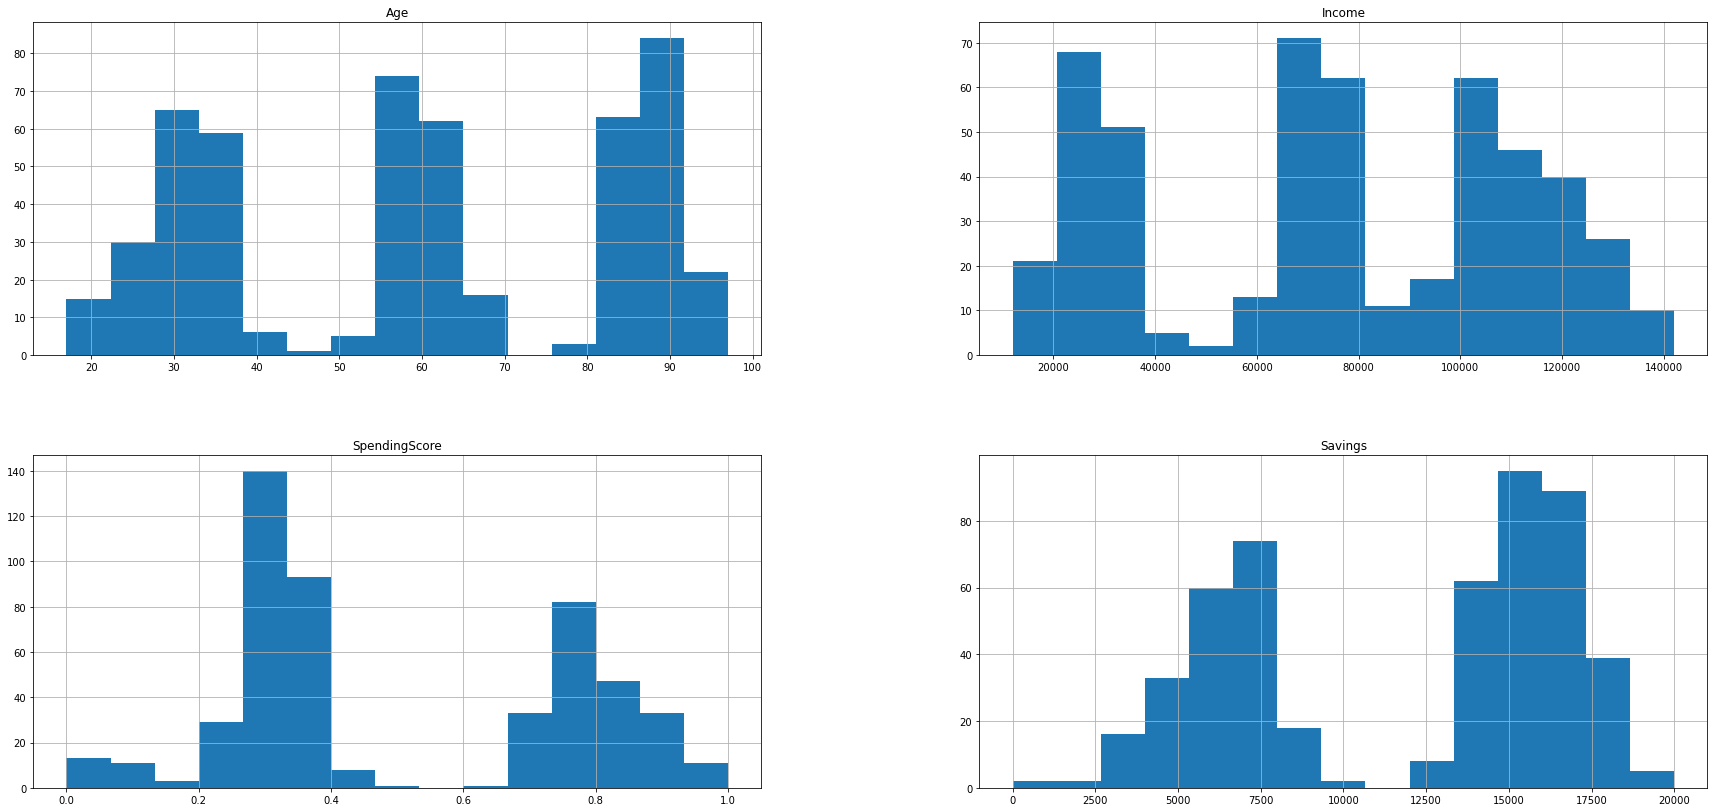

In [55]:
#Data distribution of independent variables
data.hist(layout=(4,2), bins=15, figsize=(30,30))

## Bivariate analysis - Pairplot

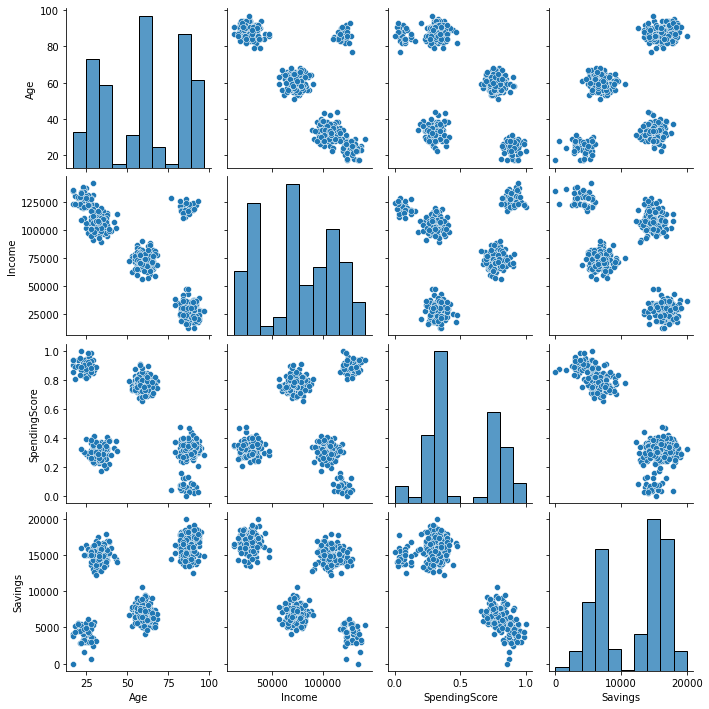

In [56]:
#creating pairplot for the data
sns.pairplot(data=data)

## Test for Correlation

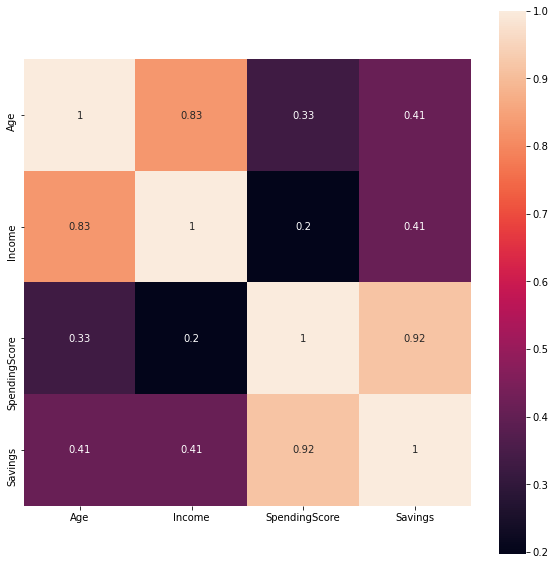

In [57]:
#heat map - normalize and recheck
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr().abs(), annot=True, fmt='.2g', square=True, ax=ax)
plt.show()

#### Based on the heat map we have few observations:
1) 'Age' is highly co related with 'Income' so we can drop it.

2) 'Savings' is highly co related with 'Spending Score' so we can drop it.

## Assessing cluster tendency
The aim of cluster tendency is to test if clustering is relevant in our dataset. A well known test for cluster tendency is the Hopkins Test.

#### Hopkins test
A statistical test which allow to guess if the data follow an uniform distribution.

In [58]:
## the hopkins test
from pyclustertend import hopkins 
hopkins(data,data.shape[0])

ModuleNotFoundError: No module named 'pyclustertend'

<b>Hopkins score of ~0.1 (as hopkins score which tends to 0) it means that the data is not uniformly distributed. 
Hence clustering can be useful to classify the observations.</b>

## Scale the data

In [59]:
#Dropping the columns from heat map insights
data = data.drop(["Age","Savings"], axis=1)

In [60]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(data))
X_train2.columns = data.columns.values
X_train2.index = data.index.values
X_train = X_train2

<AxesSubplot:xlabel='Income', ylabel='SpendingScore'>

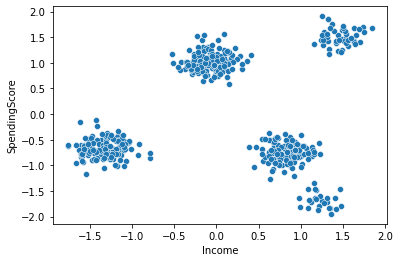

In [61]:
sns.scatterplot(x=X_train['Income'], y=X_train['SpendingScore'])

###  Agglomerative clustering for different linkages and distance measures

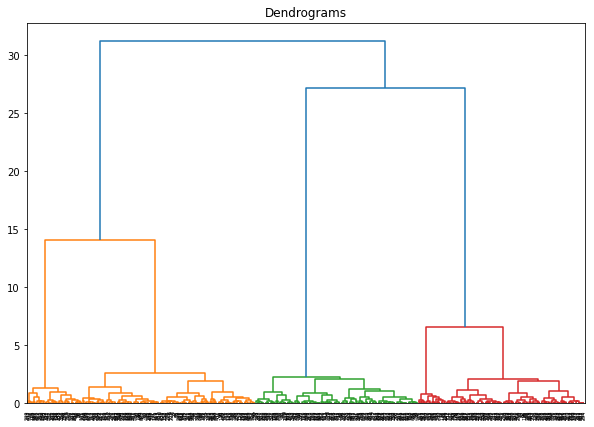

In [62]:
#importing AgglomerativeClustering

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_train, method='ward'))


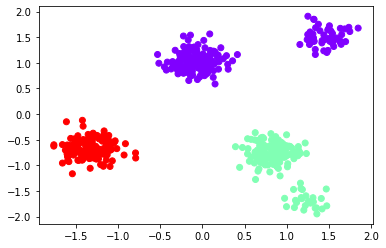

In [63]:
#AgglomerativeClustering with linkage ward and distance function as euclidean

clustering = AgglomerativeClustering(3,affinity ='euclidean', linkage = 'ward').fit(X_train);
plt.scatter(X_train['Income'],X_train['SpendingScore'], c=clustering.labels_, cmap='rainbow')

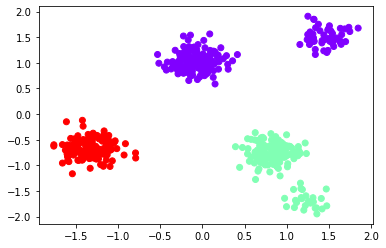

In [64]:

#AgglomerativeClustering with linkage complete and distance function as euclidean

clustering = AgglomerativeClustering(3,affinity ='euclidean', linkage = 'complete').fit(X_train);
plt.scatter(X_train['Income'],X_train['SpendingScore'], c=clustering.labels_, cmap='rainbow')

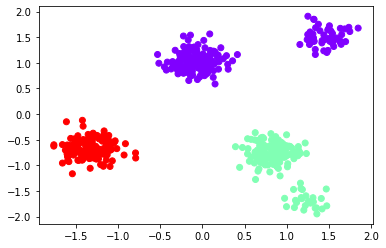

In [65]:
#AgglomerativeClustering with linkage complete and distance function as manhattan

clustering = AgglomerativeClustering(3,affinity ='manhattan', linkage = 'complete').fit(X_train);
plt.scatter(X_train['Income'],X_train['SpendingScore'], c=clustering.labels_, cmap='rainbow')

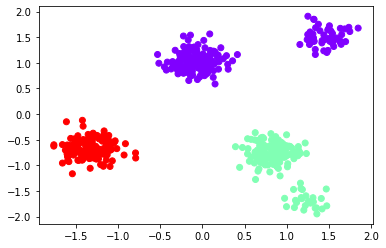

In [66]:
#AgglomerativeClustering with linkage complete and distance function as cosine

clustering = AgglomerativeClustering(3,affinity ='cosine', linkage = 'complete').fit(X_train);
plt.scatter(X_train['Income'],X_train['SpendingScore'], c=clustering.labels_, cmap='rainbow')

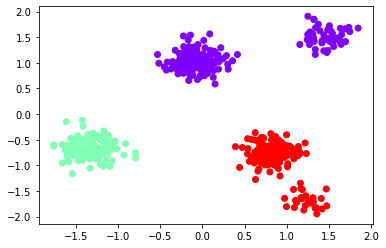

In [70]:
#AgglomerativeClustering with linkage average and distance function as euclidean

clustering = AgglomerativeClustering(3,affinity ='euclidean', linkage = 'average').fit(X_train);
plt.scatter(X_train['Income'],X_train['SpendingScore'], c=clustering.labels_, cmap='rainbow')

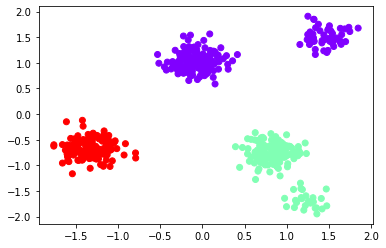

In [71]:
#AgglomerativeClustering with linkage average and distance function as manhattan

clustering = AgglomerativeClustering(3,affinity ='manhattan', linkage = 'average').fit(X_train);
plt.scatter(X_train['Income'],X_train['SpendingScore'], c=clustering.labels_, cmap='rainbow')

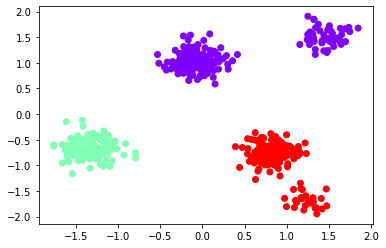

In [72]:
#AgglomerativeClustering with linkage average and distance function as cosine

clustering = AgglomerativeClustering(3,affinity ='cosine', linkage = 'average').fit(X_train);
plt.scatter(X_train['Income'],X_train['SpendingScore'], c=clustering.labels_, cmap='rainbow')